K=  1, nmse=-2.7dB
K=  2, nmse=2.29dB
K=  3, nmse=2.52dB
K=  4, nmse=3.13dB
K=  5, nmse=3.2dB
K=  6, nmse=3.4dB
K=  7, nmse=3.43dB


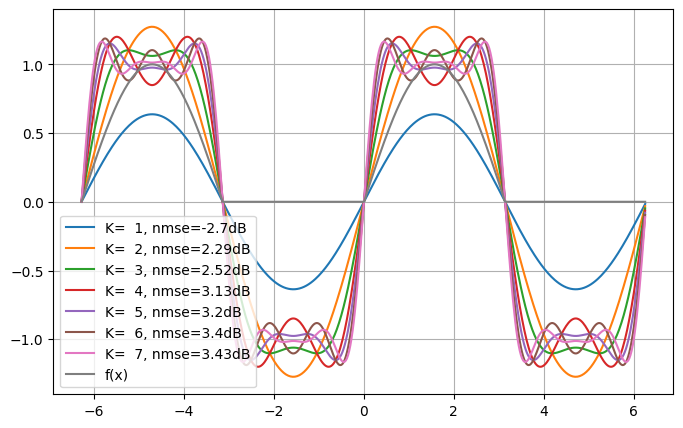

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_angles_vector(angles, low=0):
    """Векторизованная нормализация массива углов"""
    period = 2 * np.pi
    angles = np.asarray(angles)
    normalized = angles % period
    if low != 0:
        normalized = np.where(normalized < low, normalized + period, normalized)
    return normalized

def sinu(t):
    x = np.mod(t, 2 * np.pi)
    if np.abs(x) < np.pi:
        return np.sin(x)
    else:
        return 0
    

T = 2 * np.pi
omega0  = 2*np.pi/T
t = np.linspace(-T, T, 500, endpoint=False)
#sig = np.sign(np.sin( omega0 * t))

sig = [sinu(t_) for t_ in t]

fig = plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)

for K in  range(1, 8):
  fsig = 0
  for k in range(-K,K):
    if k!=0:
      Xk = -1j/(np.pi*k)*(1-np.cos(np.pi*k))
    else:
      Xk = 0
    fsig = fsig + Xk*np.exp(1j*omega0*k*t)
  nmse = 10*np.log10(np.square(sig-fsig.real).mean()/np.square(sig).mean())
  print('K={0:3}, nmse={1:.3}dB'.format(K,nmse))
  ax.plot(t,fsig.real,label='K={0:3}, nmse={1:.3}dB'.format(K,nmse))
ax.plot(t,sig,label='f(x)')
ax.grid()
ax.legend()

In [83]:
L = np.pi
l = np.linspace(-L, L, 100)

In [92]:
a0 = 0#1 / L * np.sum([sinu(l[i]) for i in range(0, len(l))])

In [93]:

def a_n(n):
    ar = [sinu(l[i]) * np.cos(n * np.pi * l[i] / L) for i in range(0, len(l))]
    return 1 / L * np.sum(ar)

In [94]:
def b_n(n):
    ar = [sinu(l[i]) * np.sin(n * np.pi * l[i] / L) for i in range(0, len(l))]
    return 1 / L * np.sum(ar)

In [95]:
def f(x, N):
    res = a0
    for n in range(1, N + 1):
        f_n = a_n(n) * np.cos(n * np.pi * x / L) + b_n(n) * np.sin(n * np.pi * x / L)
        res += f_n
        #print(res)
    return res

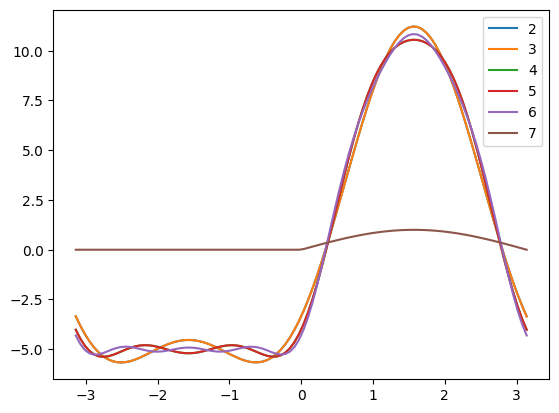

In [96]:
x = np.linspace(-np.pi ,np.pi, 100)
for n in range(2, 7):
    y = [f(x_, n) for x_ in x]
    plt.plot(x, y)
    
    
y_g = [sinu(x_) for x_ in x ]
plt.plot(x, y_g)
plt.legend(["2", "3", "4", "5", "6", "7", "orig"])
